In [18]:
from IPython.display import clear_output
import numpy as np
import matplotlib.pyplot as plt
import serial
import time

# We will send data through the UART into the FPGA

In [23]:
def sendDataThenRead(data):
    baud_rate = 1000000
    ser = serial.Serial('/dev/ttyUSB0', baud_rate)
    for i in data:
        ser.write([i])
    time.sleep(0.01)
    return ser.read()
        
def packetize(im):
    # Reverse the bits and chunk them up into 8 bit packets
    pic = list(reversed(im))
    pkts = []
    for i in range(0, len(pic), 8):
        pkts.append([0]*max(0, -(len(pic)-i-8)) + pic[max(0, len(pic)-i-8) : len(pic)-i])
    return pkts

def to_byte_pkts(pkts):
    byte_pkts = []
    for pkt in pkts:
        byte = ''.join([str(x) for x in pkt])
        # this will fail if x is not 0 or 1.
        byte = int(byte, 2)
        byte_pkts.append(byte)
    return byte_pkts

In [24]:
arr = np.load('matrices/bin_mnist_flat.npz.npy')

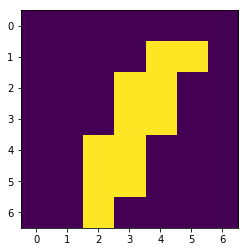

Sending 2-th data point... 


KeyboardInterrupt: 

In [22]:
pred = "NOT IMPLEMENTED"
for i in range(len(arr)):
    clear_output(wait=True)
    plt.imshow(arr[i].reshape(7, 7))
    plt.show()
    print("Sending {}-th data point... ".format(i))
    pred = sendDataThenRead(arr[i])
    print("Prediction : {}".format(pred))
    time.sleep(1)